# IMPORTING LIBRARIES

In [ ]:
import os
import csv
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arr = os.listdir()
#arr = arr[:-1]
arr = arr[2:]
len(arr)

3248

In [3]:
import pandas
df = []
for c in arr:
    f = open(c)
    csv_f = csv.reader(f)
    y = []
    k = 0
    count = 1
    for row in csv_f:
        for j in row:
            if ('Time;Upv1;Upv2;Upv3;Upv4;Upv5;Upv6;Upv7;Upv8;Ipv1;Ipv2;Ipv3;Ipv4;Ipv5;Ipv6;Ipv7;Ipv8' not in j):
                if ('#SmartLogger' in j) & (count != 1):
                    k = 1
                    break
                if count == 2:
                    x = row[0].split(';')
                    y.append(x)
                elif (count == 3):
                    x = row[0].split(';')
                    y.append(x)
            else:
                count += 1
        if k == 1:
            break
    data = pd.DataFrame(y)
    if (type(data.columns) == pandas.core.indexes.range.RangeIndex):
        data.drop(columns = [17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34],inplace = True, axis = 1)
        data.columns = ['Time','Upv1','Upv2','Upv3','Upv4','Upv5','Upv6','Upv7','Upv8','Ipv1','Ipv2','Ipv3','Ipv4','Ipv5','Ipv6','Ipv7','Ipv8']
        df.append(data)
    else:
        del(data)
    

In [4]:
final = pd.concat(df)

In [5]:
final

,Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Ipv1,Ipv2,Ipv3,Ipv4,Ipv5,Ipv6,Ipv7,Ipv8
0,01-03-2020 18:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01-03-2020 18:35:00,128.2,128.2,128.3,128.3,128.4,128.4,130.3,130.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01-03-2020 18:30:00,396.5,396.5,418.1,418.1,393.5,393.5,390.4,390.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01-03-2020 18:25:00,420.3,420.3,469.1,469.1,439.1,439.1,440.8,440.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01-03-2020 18:20:00,480.5,480.5,475.3,475.3,499.4,499.4,482.5,482.5,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,31-03-2020 06:20:00,600.6,600.6,601.2,601.2,601.2,601.2,597.6,597.6,0.0,0.1,0.1,0.2,0.1,0.1,0.1,0.0
305,31-03-2020 06:15:00,558.7,558.7,559.2,559.2,559.3,559.3,573.6,573.6,0.0,0.1,0.0,0.1,0.1,0.1,0.1,0.0
306,31-03-2020 06:10:00,528.7,528.7,505.4,505.4,505.2,505.2,489.9,489.9,0.0,0.1,0.0,0.1,0.0,0.1,0.0,0.0
307,31-03-2020 06:05:00,434.7,434.7,447.3,447.3,435.0,435.0,452.4,452.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
final.shape

(435928, 17)

In [7]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435928 entries, 0 to 308
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Time    435928 non-null  object
 1   Upv1    433019 non-null  object
 2   Upv2    433019 non-null  object
 3   Upv3    433019 non-null  object
 4   Upv4    433019 non-null  object
 5   Upv5    433018 non-null  object
 6   Upv6    433017 non-null  object
 7   Upv7    433016 non-null  object
 8   Upv8    433016 non-null  object
 9   Ipv1    433016 non-null  object
 10  Ipv2    433016 non-null  object
 11  Ipv3    433016 non-null  object
 12  Ipv4    433016 non-null  object
 13  Ipv5    433016 non-null  object
 14  Ipv6    433016 non-null  object
 15  Ipv7    433016 non-null  object
 16  Ipv8    433016 non-null  object
dtypes: object(17)
memory usage: 59.9+ MB


In [8]:
final.dropna(inplace = True)
final.set_index('Time', inplace = True)
for i in final.columns:
    final[i] = pd.to_numeric(final[i])
final

,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Ipv1,Ipv2,Ipv3,Ipv4,Ipv5,Ipv6,Ipv7,Ipv8
Time,,,,,,,,,,,,,,,,
01-03-2020 18:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-03-2020 18:35:00,128.2,128.2,128.3,128.3,128.4,128.4,130.3,130.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-03-2020 18:30:00,396.5,396.5,418.1,418.1,393.5,393.5,390.4,390.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-03-2020 18:25:00,420.3,420.3,469.1,469.1,439.1,439.1,440.8,440.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-03-2020 18:20:00,480.5,480.5,475.3,475.3,499.4,499.4,482.5,482.5,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-03-2020 06:20:00,600.6,600.6,601.2,601.2,601.2,601.2,597.6,597.6,0.0,0.1,0.1,0.2,0.1,0.1,0.1,0.0
31-03-2020 06:15:00,558.7,558.7,559.2,559.2,559.3,559.3,573.6,573.6,0.0,0.1,0.0,0.1,0.1,0.1,0.1,0.0
31-03-2020 06:10:00,528.7,528.7,505.4,505.4,505.2,505.2,489.9,489.9,0.0,0.1,0.0,0.1,0.0,0.1,0.0,0.0


## DATA CLEANING

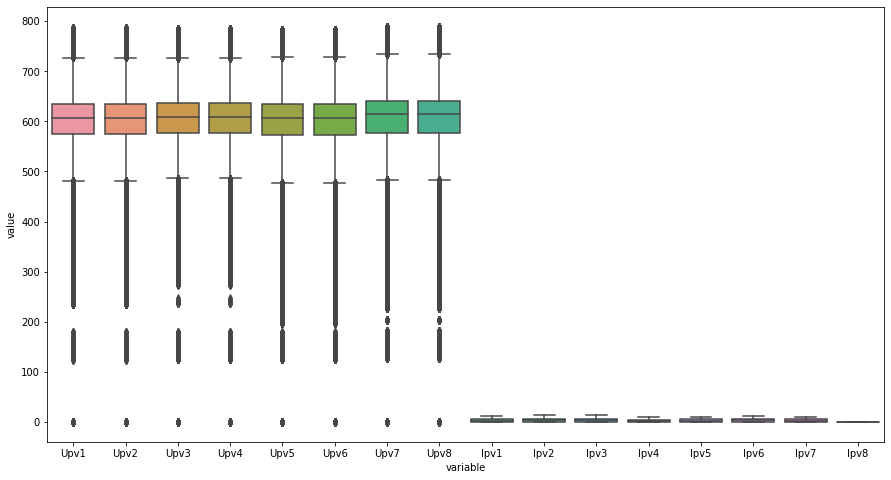

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(final))

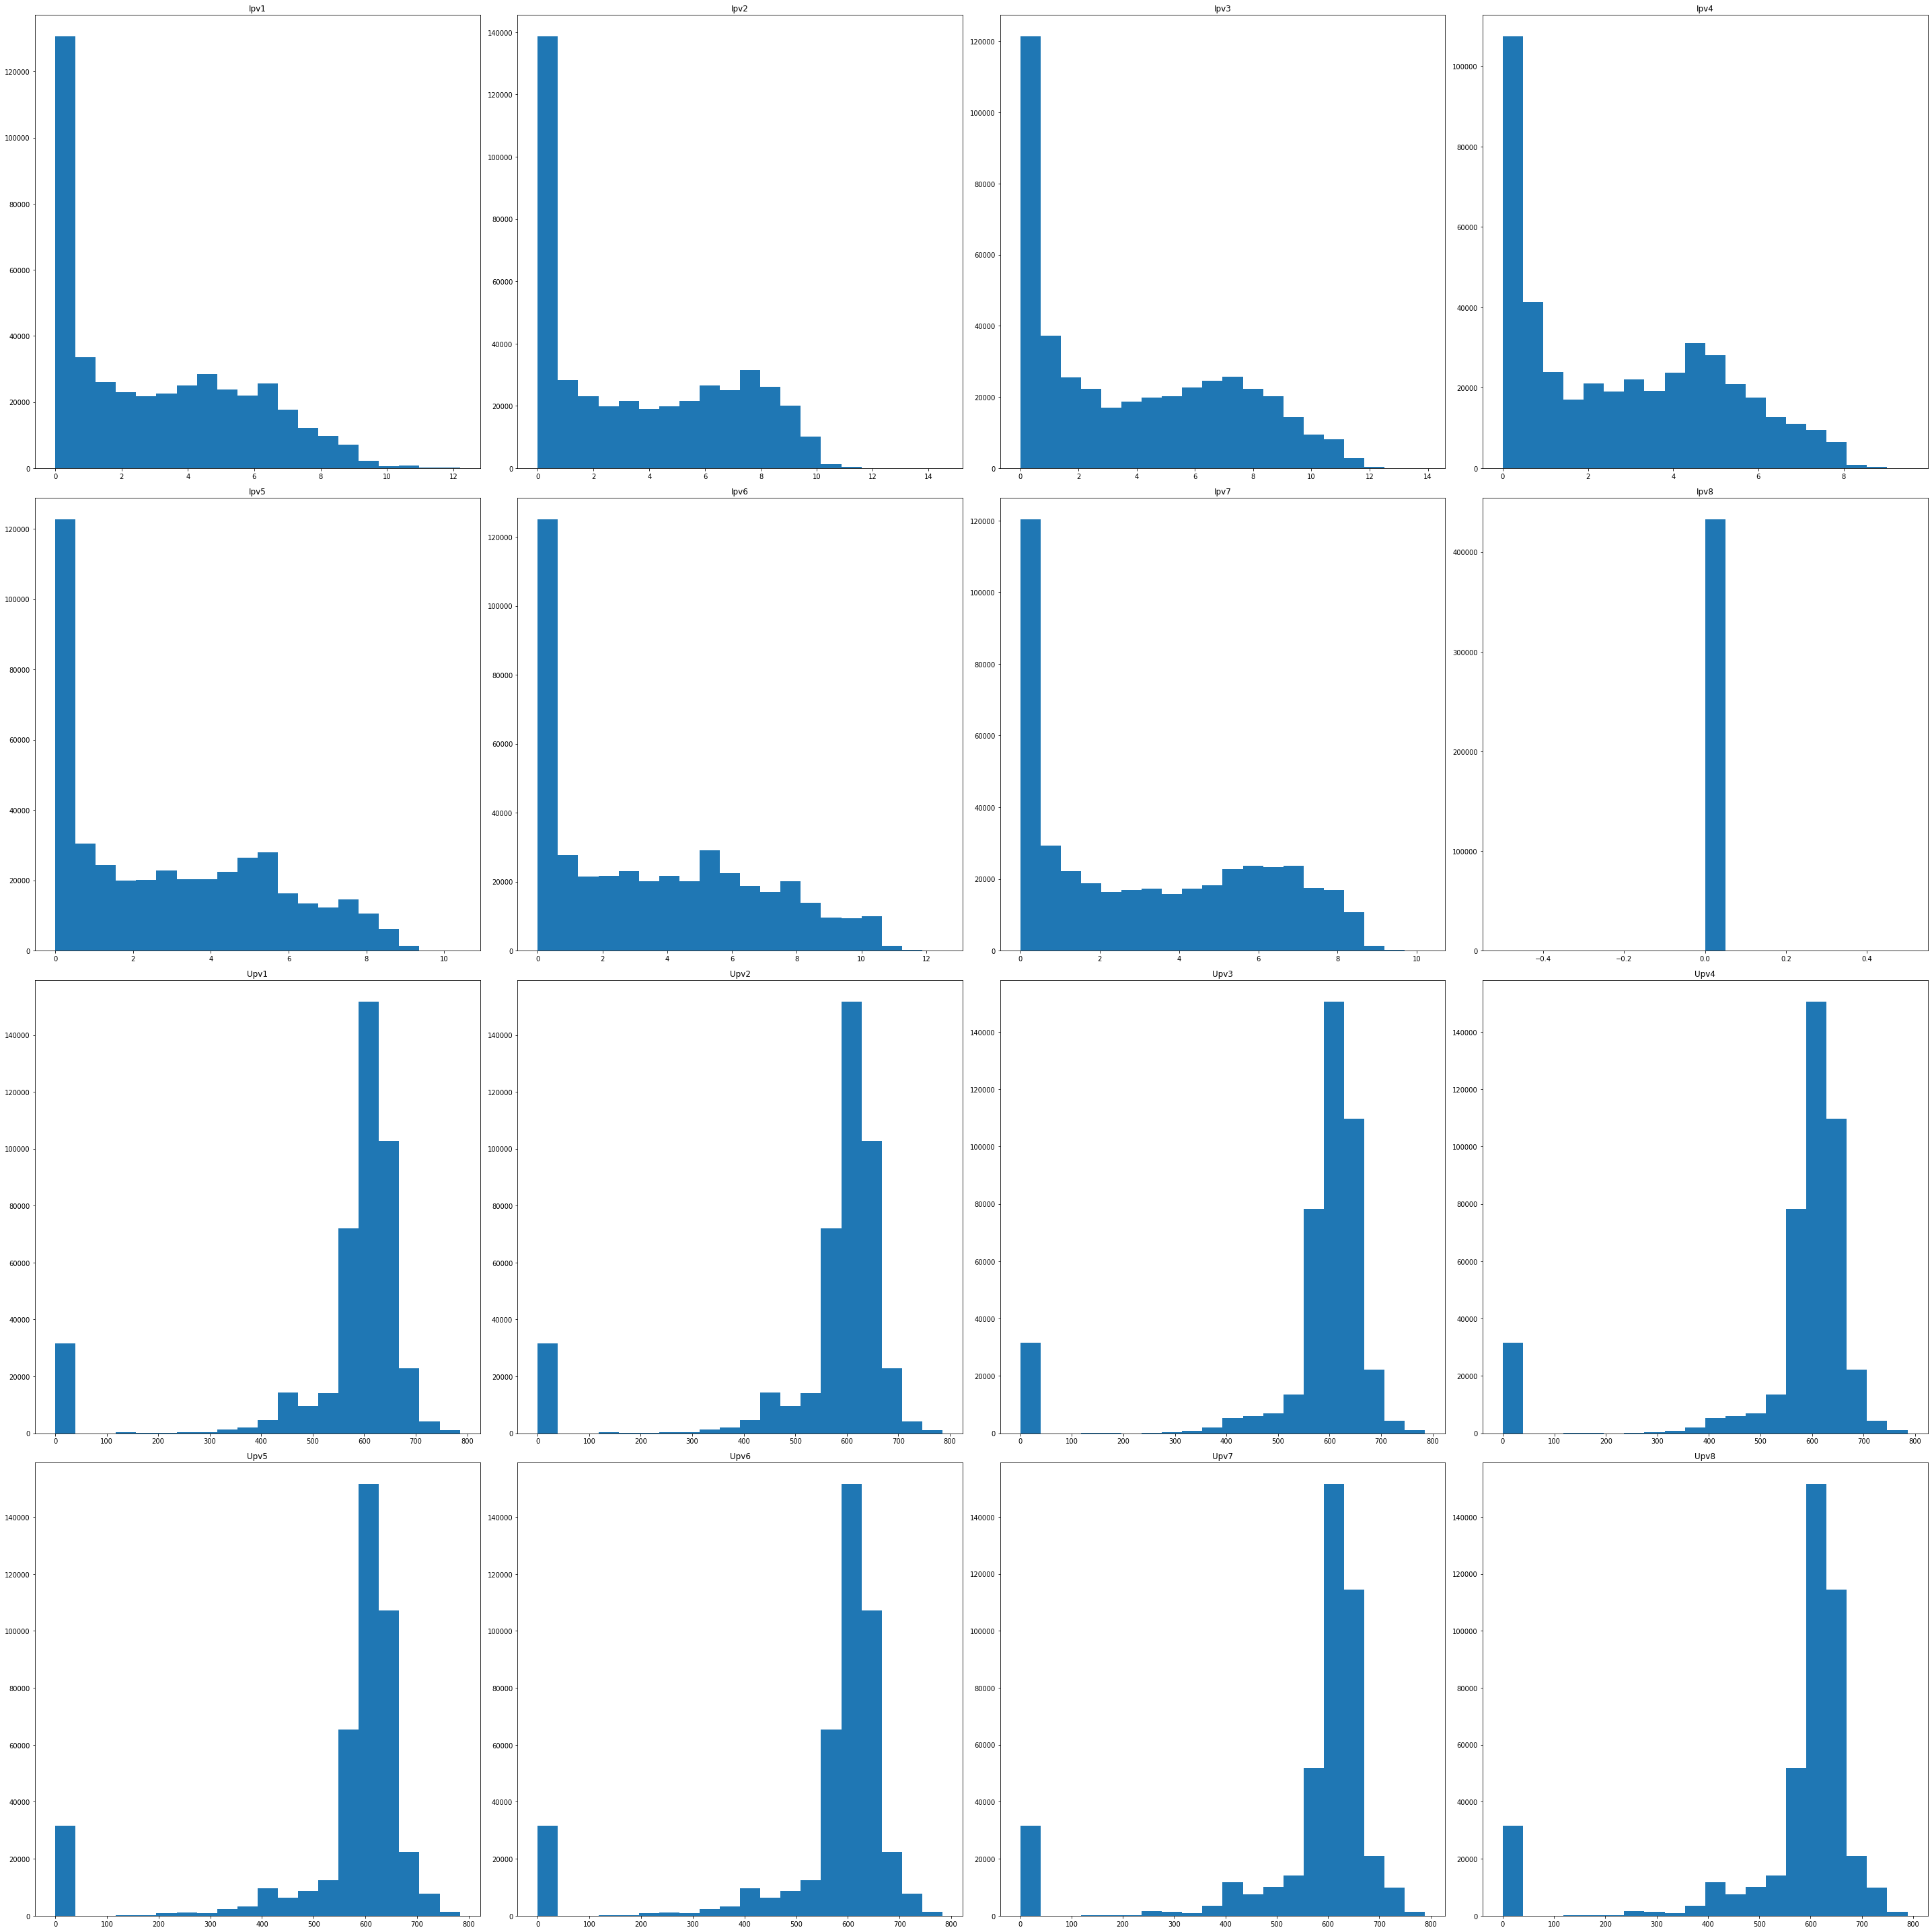

In [10]:
final.hist(bins = 20, grid = False, figsize = (40,40))
plt.tight_layout()

In [11]:
final = final.loc[~(final==0.).all(axis=1)]
final.shape

(401472, 16)

In [12]:
final.drop('Ipv8', axis = 1, inplace = True)

C:\Users\priya\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## INTERQUARTILE RANGE 

In [13]:
Q1 = final.quantile(0.25)
Q3 = final.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Upv1    53.725
Upv2    53.725
Upv3    53.400
Upv4    53.400
Upv5    54.300
Upv6    54.300
Upv7    52.100
Upv8    52.100
Ipv1     4.700
Ipv2     6.300
Ipv3     6.200
Ipv4     4.200
Ipv5     4.500
Ipv6     5.600
Ipv7     5.300
dtype: float64


In [14]:
final = final[~((final < (Q1 - 1.5 * IQR)) |(final > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
final.shape

(347685, 15)

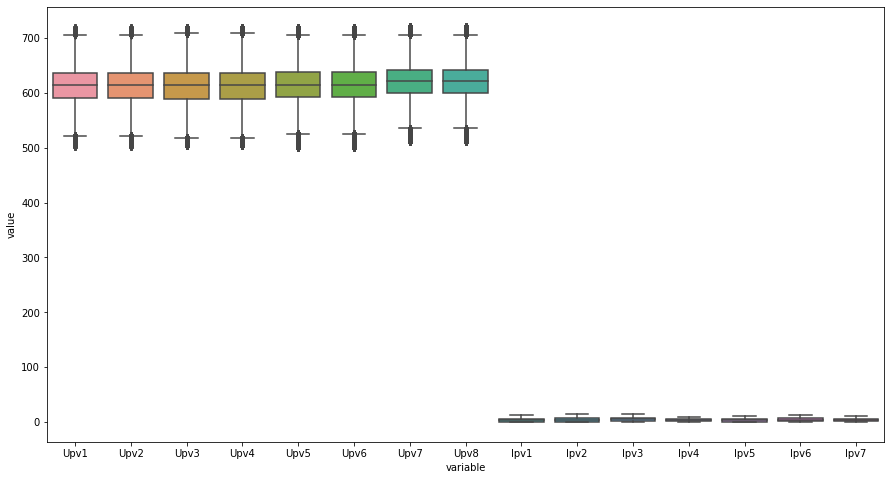

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(final))

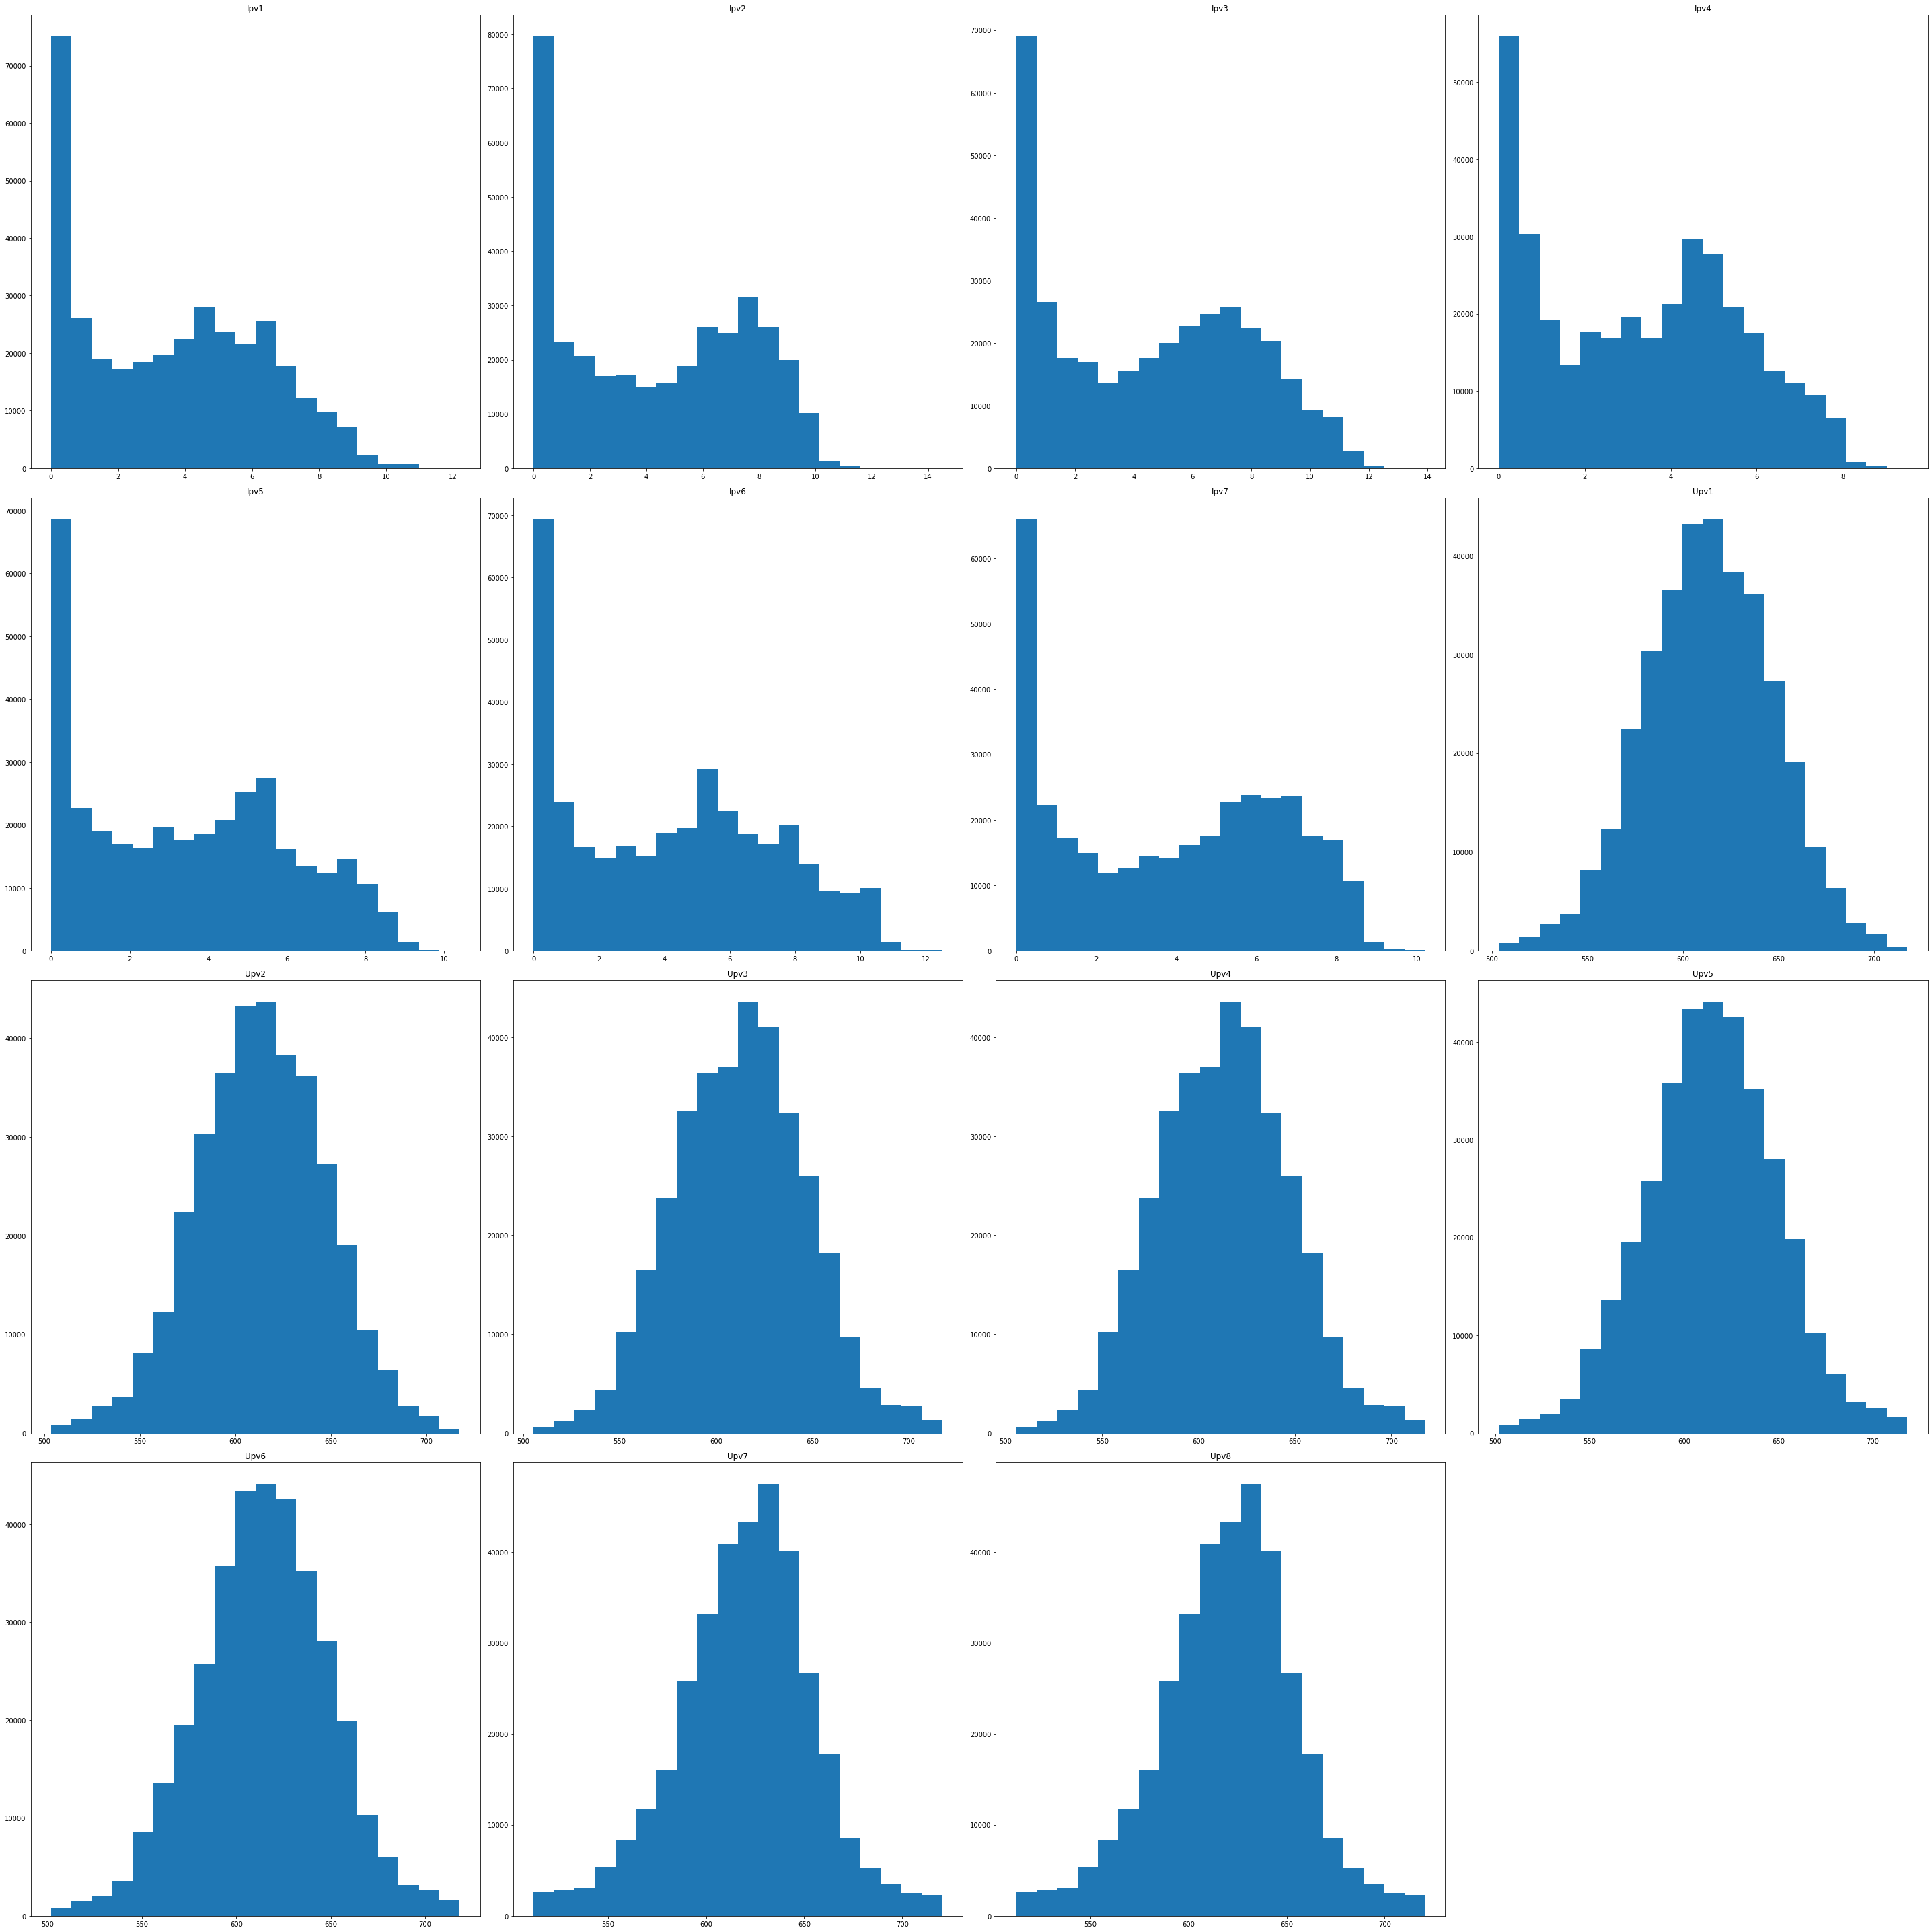

In [17]:
final.hist(bins = 20, grid = False, figsize = (40,40))
plt.tight_layout()

### After the data cleaning and removal of outliers, most of the variables seems to be normal

## FORMATION OF NEW COLUMN AND ITS PLOTS

In [18]:
final['power_inv1'] = final['Upv1'] * final['Ipv1']

In [19]:
mean = final['power_inv1'].mean()
std = final['power_inv1'].std()
print(mean)
print(std)

2177.1359007149695
1596.673595809905


In [20]:
final = final.reset_index()
final['Time'] = pd.to_datetime(final['Time'])
final['date'] = final['Time'].dt.date
final.set_index('Time', inplace = True)

In [21]:
grouped_data = final.sort_values(by = 'date').groupby('date').sum()

In [22]:
grouped_data.columns

Index(['Upv1', 'Upv2', 'Upv3', 'Upv4', 'Upv5', 'Upv6', 'Upv7', 'Upv8', 'Ipv1',
       'Ipv2', 'Ipv3', 'Ipv4', 'Ipv5', 'Ipv6', 'Ipv7', 'power_inv1'],
      dtype='object')

In [23]:
grouped_data['mean'] = grouped_data['power_inv1'].rolling(2).mean()
grouped_data['std'] = grouped_data['power_inv1'].rolling(2).std()

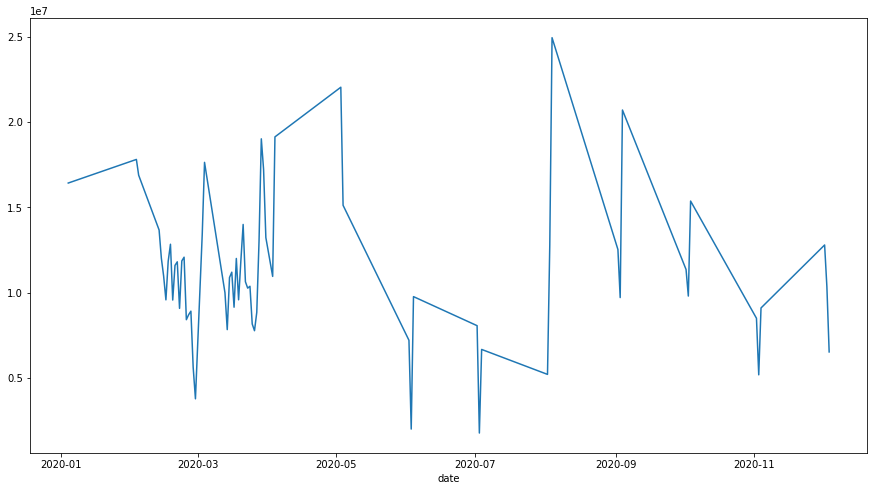

In [24]:
plt.figure(figsize=(15,8))
grouped_data['mean'].plot(kind = 'line')

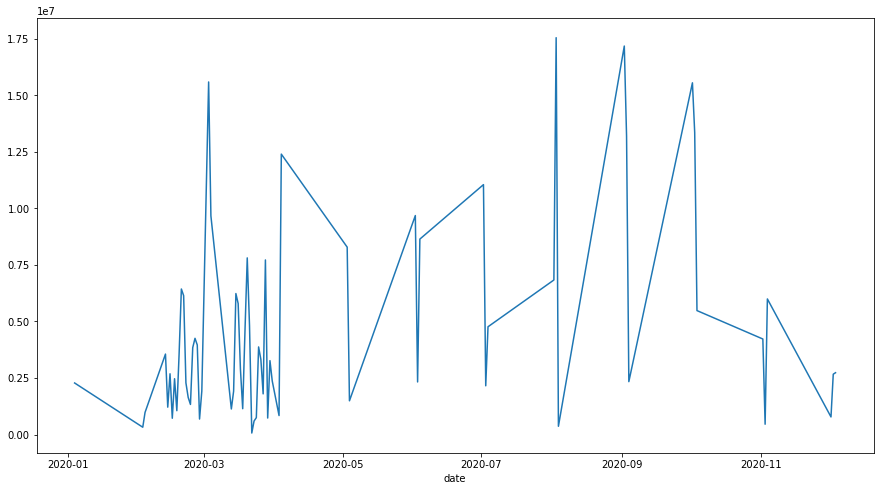

In [25]:
plt.figure(figsize=(15,8))
grouped_data['std'].plot(kind = 'line')